In [29]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [30]:
spam = pd.read_csv('../../info/spam.csv')

In [31]:
spam.head()

,Unnamed: 0,make,address,all,num3d,our,over,remove,internet,order,...,charSemicolon,charRoundbracket,charSquarebracket,charExclamation,charDollar,charHash,capitalAve,capitalLong,capitalTotal,type
0,1,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,...,0.00,0.000,0.0,0.778,0.000,0.000,3.756,61,278,spam
1,2,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,...,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,spam
2,3,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,...,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,spam
3,4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,...,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,spam
4,5,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,...,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191,spam


In [32]:
from sklearn.naive_bayes import GaussianNB

In [33]:
model = GaussianNB()

In [34]:
X, y = spam.drop('type', axis=1), spam['type']

In [35]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [36]:
model.fit(X_train, y_train)

GaussianNB()

In [37]:
preds = model.predict(X_test)

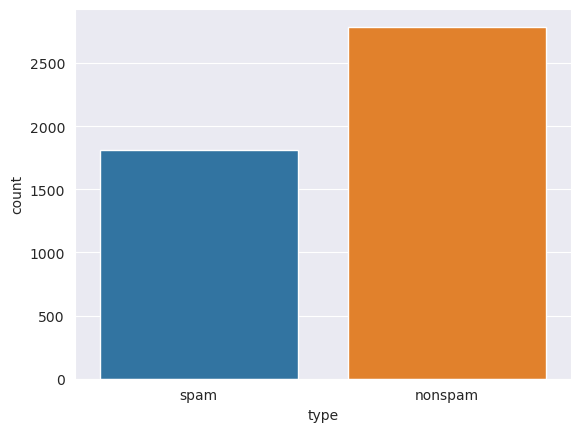

In [38]:
sns.countplot(data=spam, x=spam['type'])
plt.savefig('report_pictures/countplot.png');

In [39]:
from sklearn.metrics import f1_score, precision_score, accuracy_score, recall_score, classification_report, ConfusionMatrixDisplay, RocCurveDisplay

accuracy_scores = []
precision_scores = []
f1_scores = []
recall_scores = []
model = GaussianNB(priors=[1/3, 2/3])
def run_model(model, test_size, X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=42)
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    accuracy_scores.append(accuracy_score(y_test, preds))
    precision_scores.append(precision_score(y_test, preds, pos_label='spam'))
    f1_scores.append(f1_score(y_test, preds, pos_label='spam'))
    recall_scores.append(recall_score(y_test, preds, pos_label='spam'))
    #ConfusionMatrixDisplay.from_estimator(model, X_test, y_test, cmap='magma')
    rc = RocCurveDisplay.from_estimator(model, X_test, y_test, color='purple')
    rc.figure_.savefig(f'report_pictures/roc{np.round(test_size, 2)}.png')
    print(classification_report(y_test, preds))

In [40]:
w1 = len(spam[spam['type'] == 'spam'])
w2 = len(spam[spam['type'] == 'nonspam'])
class_weights = [1 / (1 + w1 / w2), 1 - 1 / (1 + w1 / w2)] 

Test size = 0.05
              precision    recall  f1-score   support

     nonspam       0.94      0.81      0.87       132
        spam       0.79      0.93      0.85        99

    accuracy                           0.86       231
   macro avg       0.86      0.87      0.86       231
weighted avg       0.87      0.86      0.86       231

Test size = 0.10
              precision    recall  f1-score   support

     nonspam       0.96      0.82      0.88       266
        spam       0.79      0.95      0.86       195

    accuracy                           0.87       461
   macro avg       0.87      0.88      0.87       461
weighted avg       0.89      0.87      0.87       461

Test size = 0.15
              precision    recall  f1-score   support

     nonspam       0.96      0.79      0.86       387
        spam       0.78      0.96      0.86       304

    accuracy                           0.86       691
   macro avg       0.87      0.87      0.86       691
weighted avg       0.88

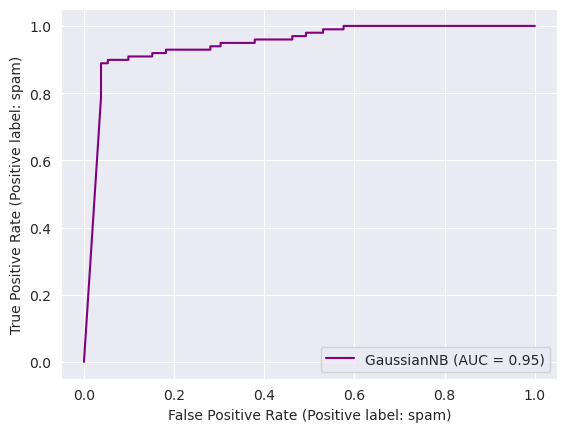

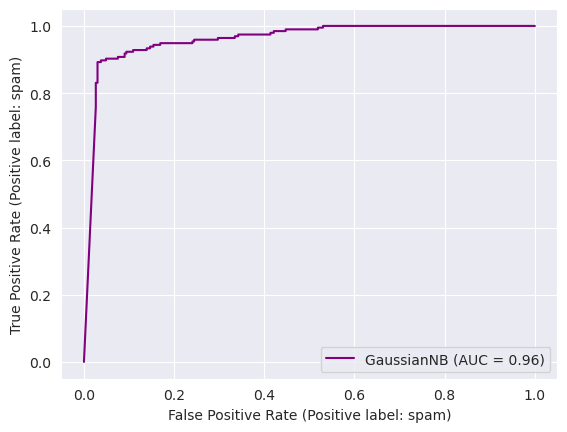

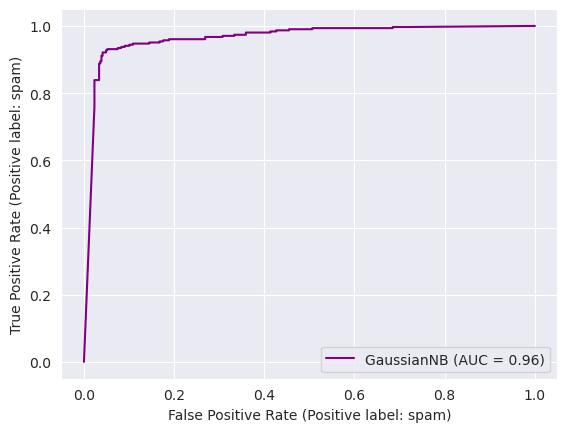

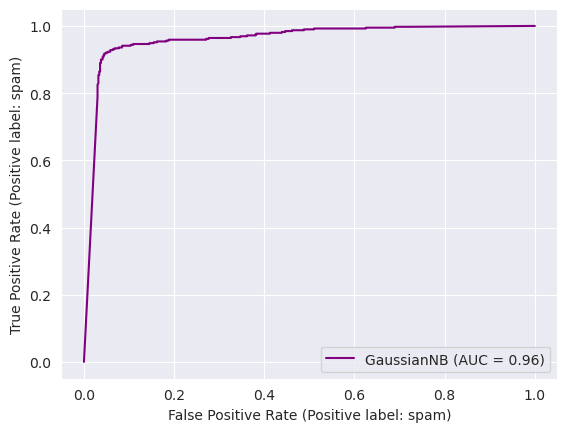

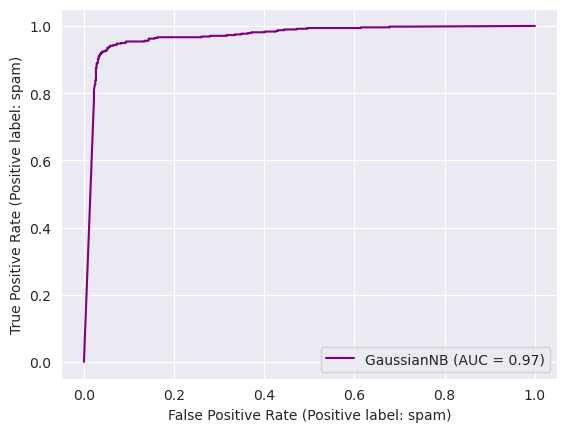

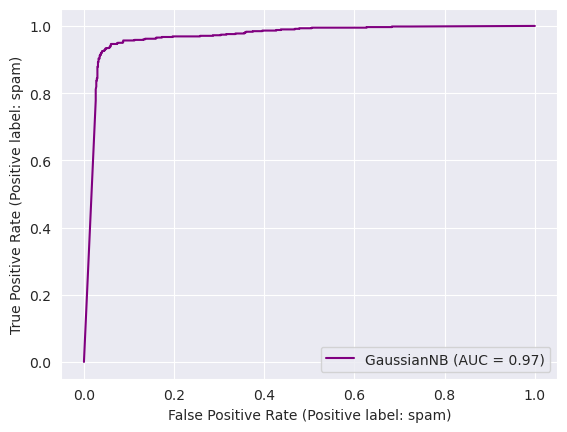

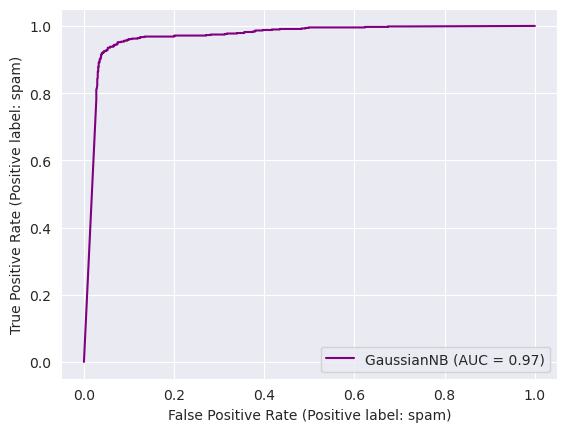

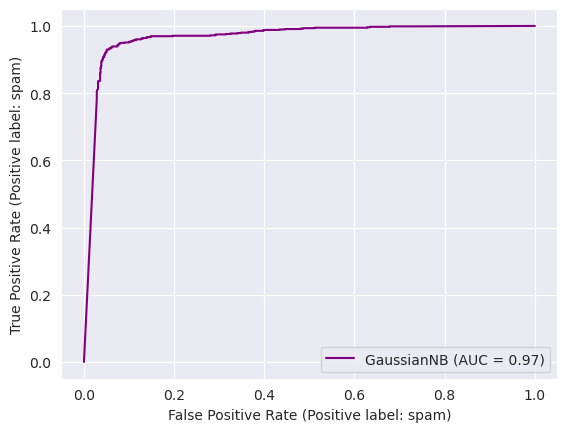

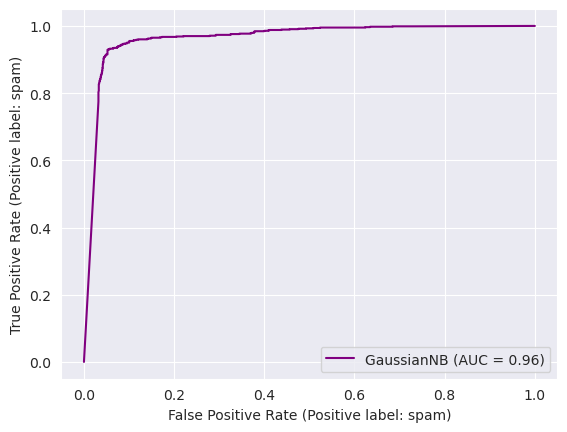

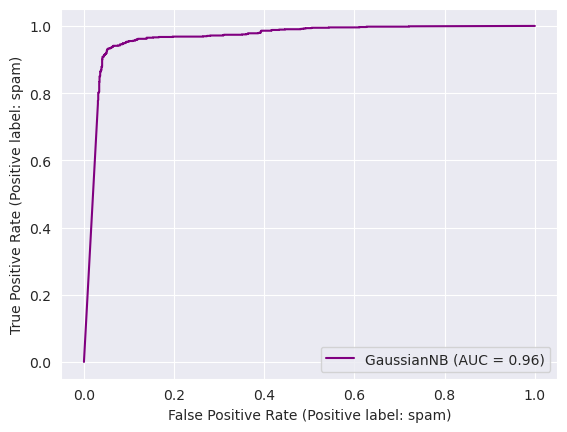

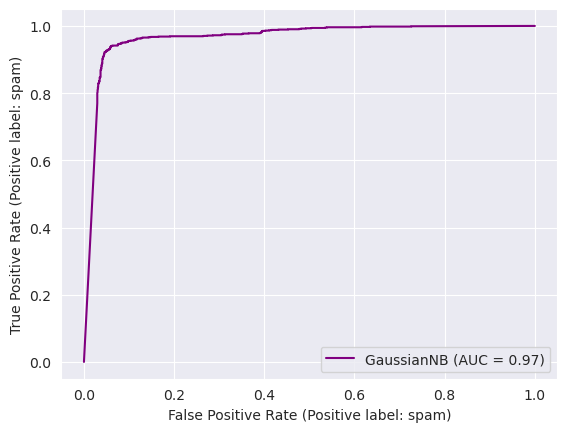

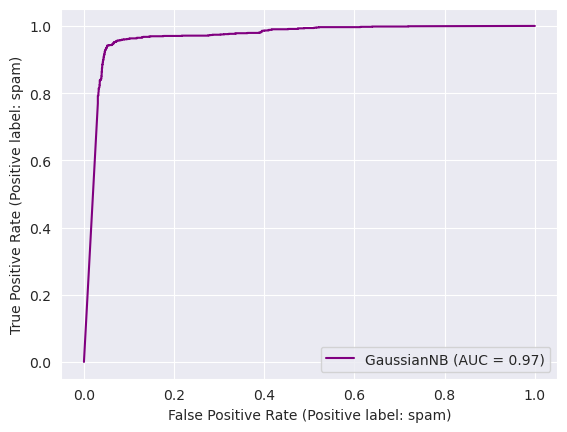

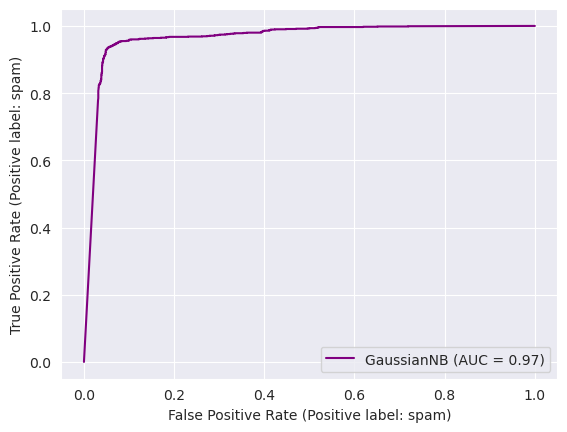

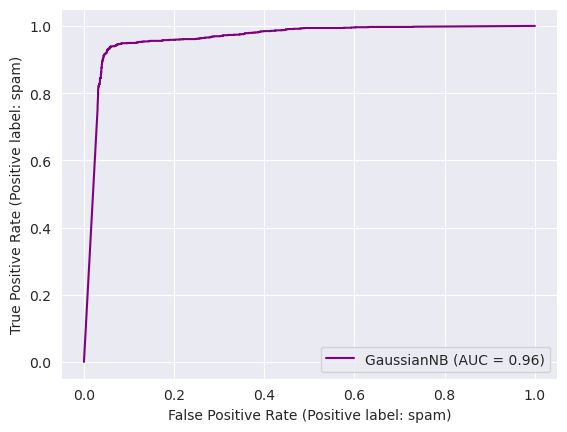

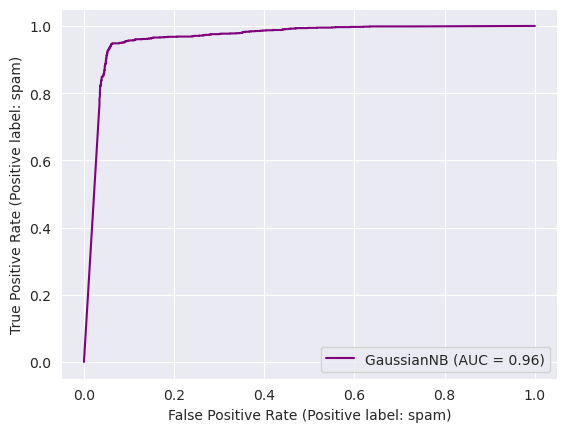

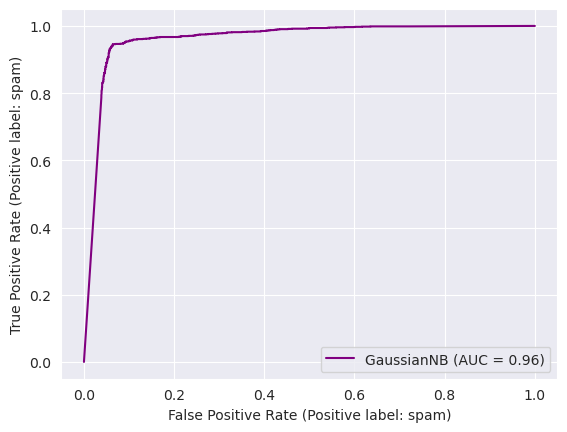

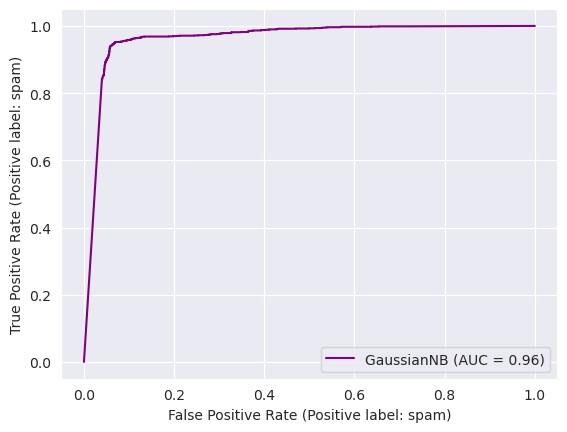

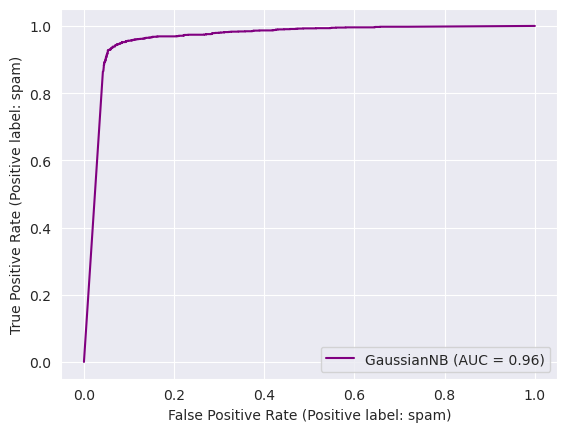

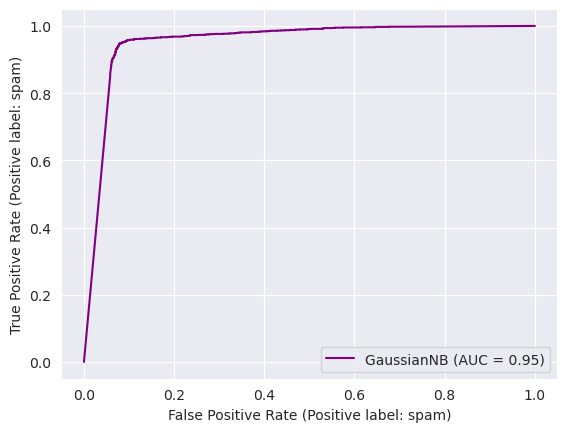

In [41]:
model = GaussianNB()

test_range = np.arange(0.05, 1, 0.05)
for i in test_range:
    print(f"Test size = {i:.2f}")
    run_model(model, i, X, y)

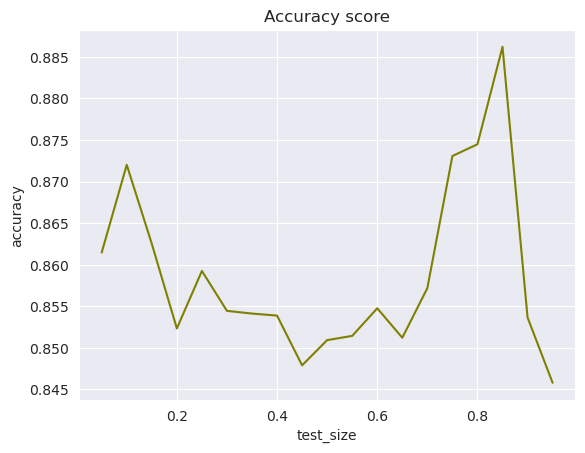

In [42]:
plt.title('Accuracy score')
plt.plot(test_range, accuracy_scores, color='olive')
plt.xlabel('test_size')
plt.ylabel('accuracy');

Text(0, 0.5, 'F1 score')

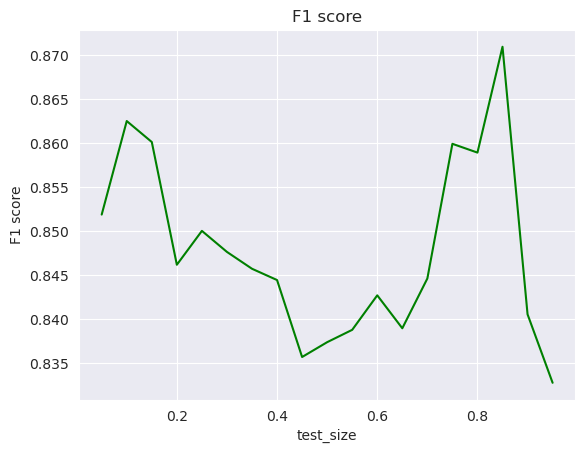

In [43]:
plt.title('F1 score')
plt.plot(test_range, f1_scores, color='green')
plt.xlabel('test_size')
plt.ylabel('F1 score')

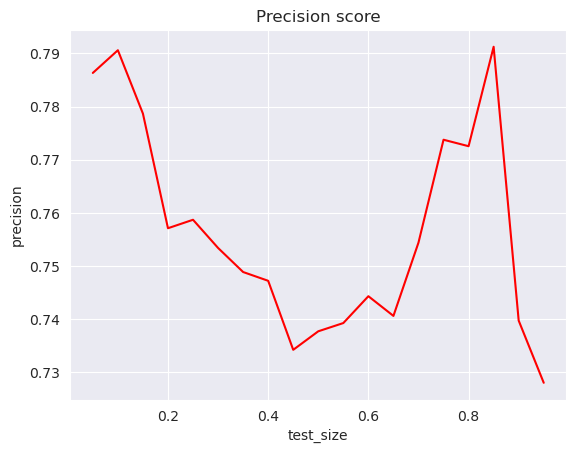

In [44]:
plt.title('Precision score')
plt.plot(test_range, precision_scores, color='red')
plt.xlabel('test_size')
plt.ylabel('precision');

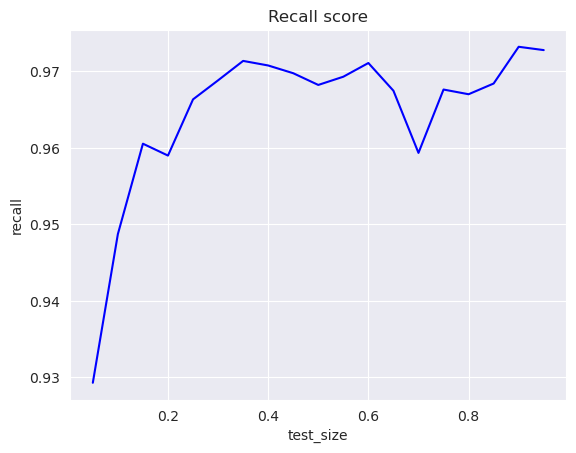

In [45]:
plt.title('Recall score')
plt.plot(test_range, recall_scores, color='Blue')
plt.xlabel('test_size')
plt.ylabel('recall');

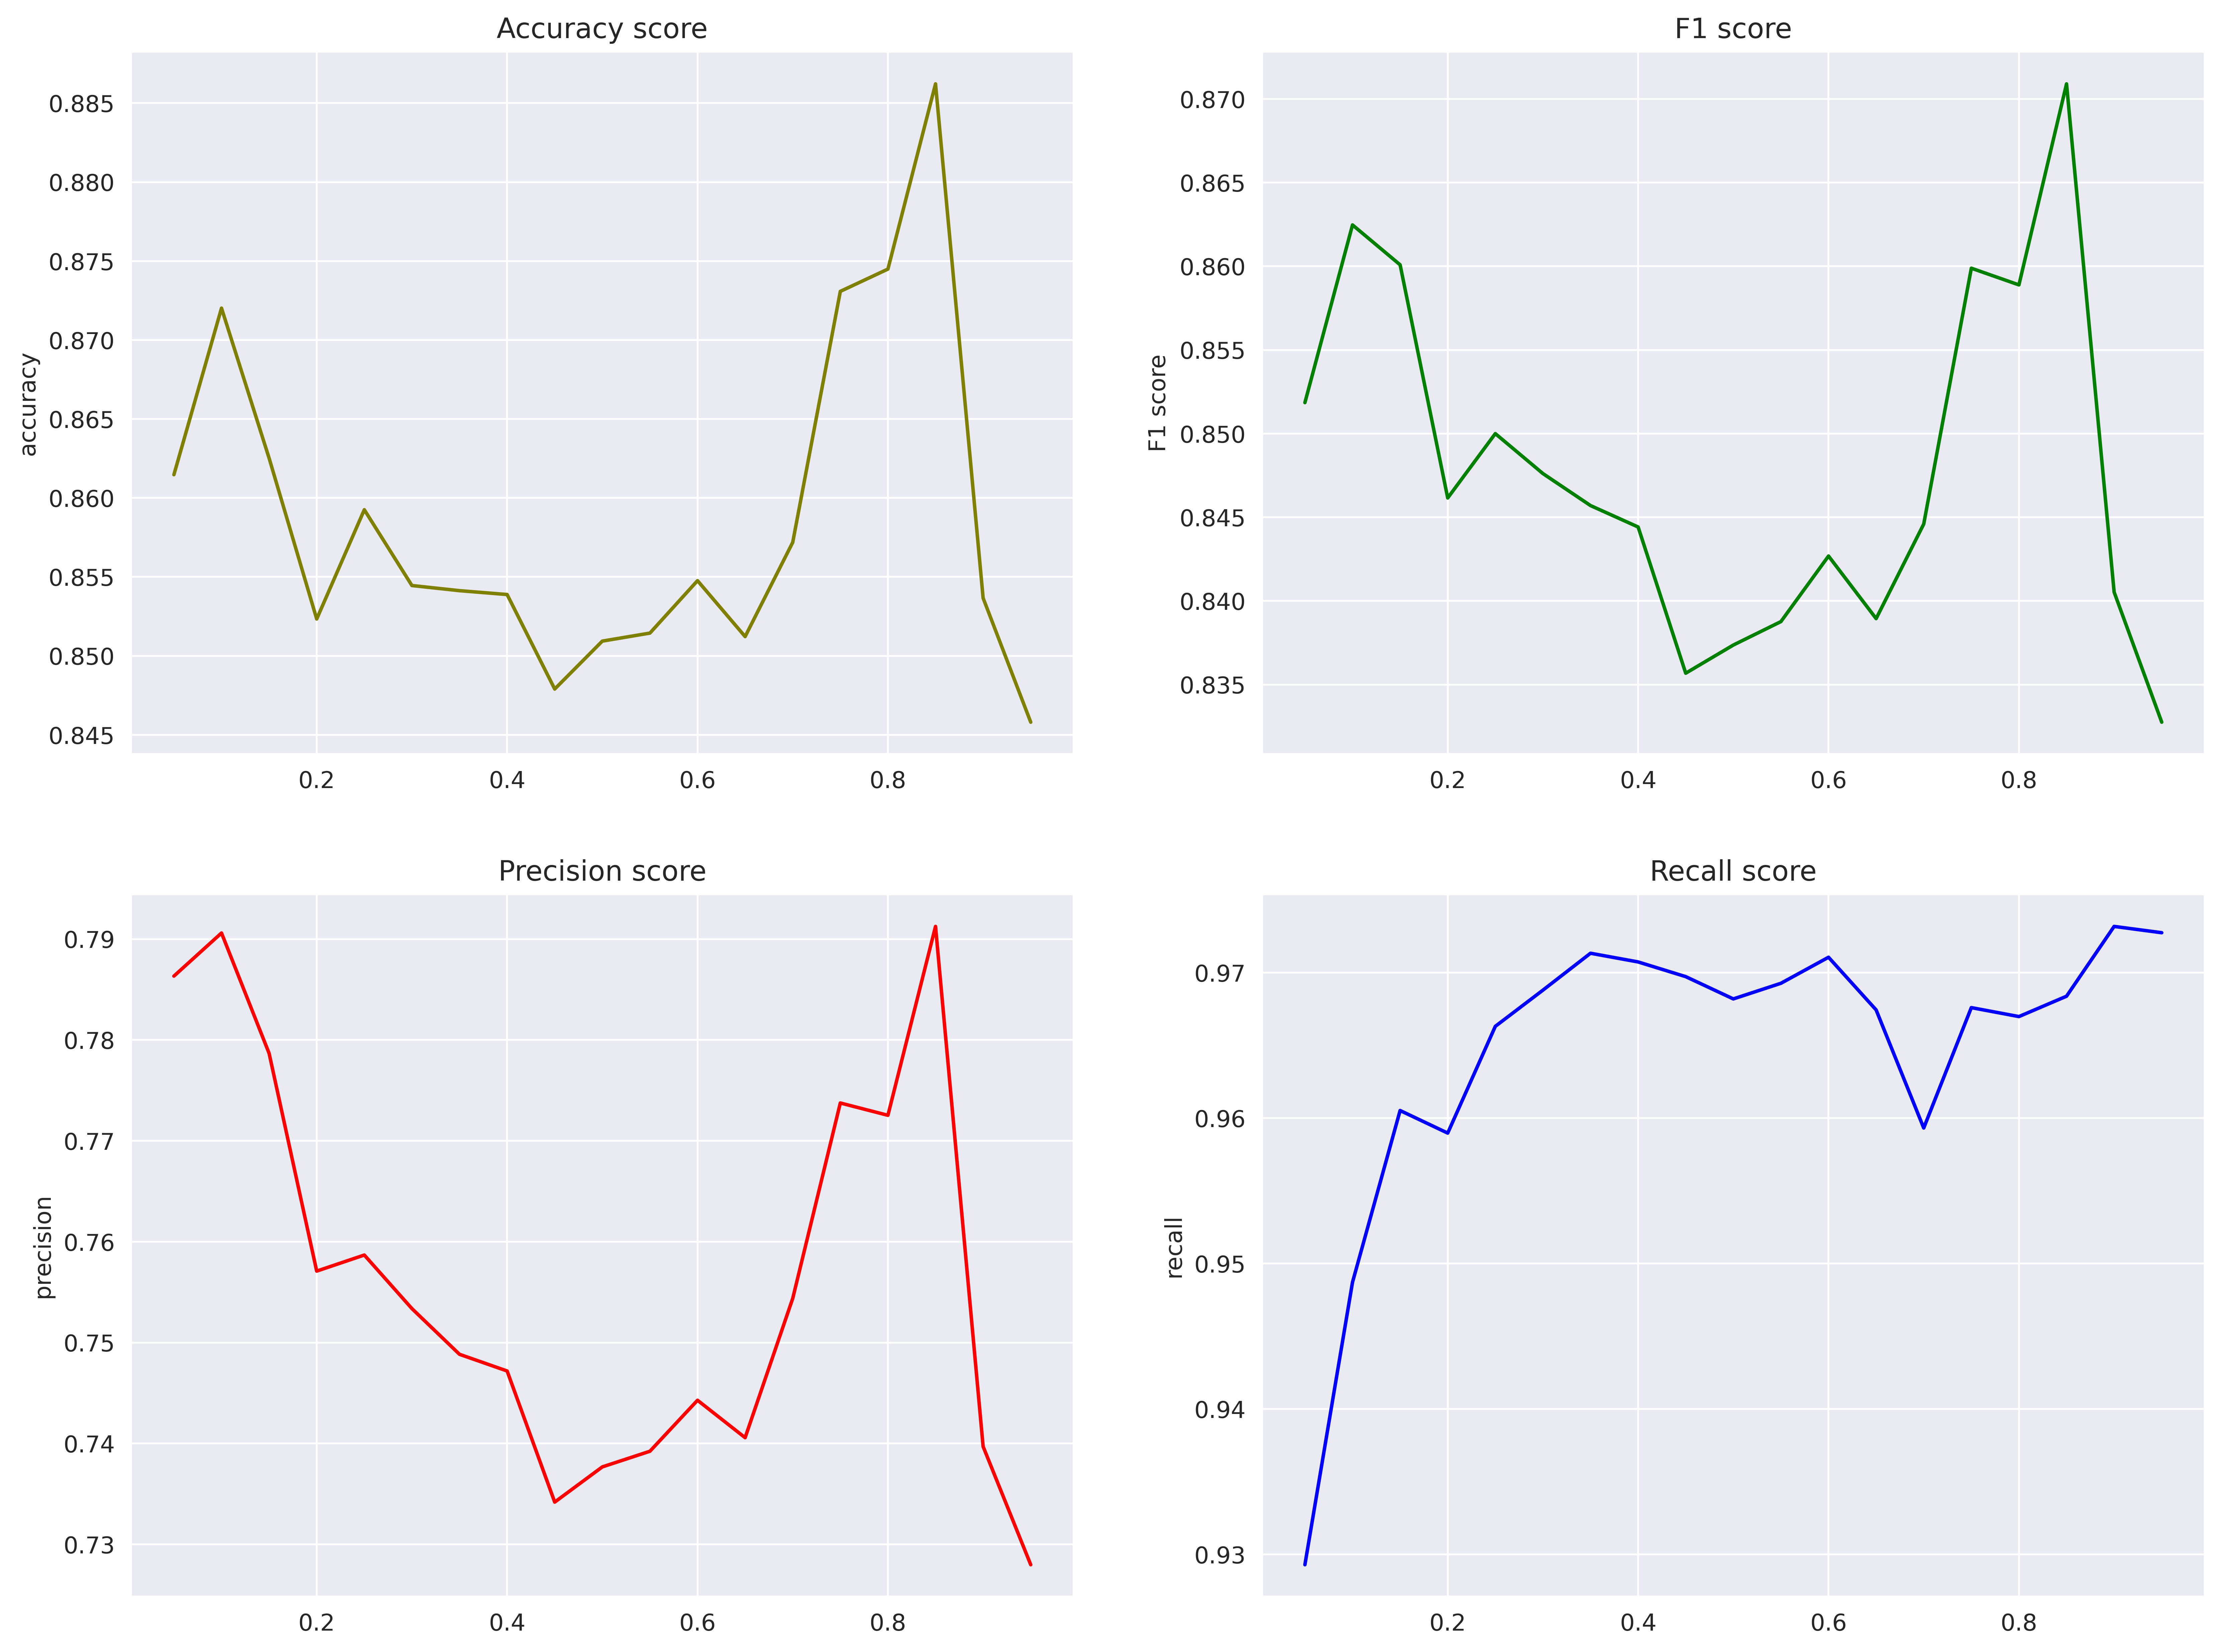

In [46]:
errs = list(map(lambda x: 1 - x, accuracy_scores))
fig, ax = plt.subplots(2, 2, figsize=(16, 12), dpi=500)
ax[0, 0].set_title('Accuracy score')
ax[0, 0].plot(test_range, accuracy_scores, color='olive')
ax[0, 0].set_ylabel('accuracy')

ax[0, 1].set_title('F1 score')
ax[0, 1].plot(test_range, f1_scores, color='green')
ax[0, 1].set_ylabel('F1 score')

ax[1, 0].set_title('Precision score')
ax[1, 0].plot(test_range, precision_scores, color='red')
ax[1, 0].set_ylabel('precision')

ax[1, 1].set_title('Recall score')
ax[1, 1].plot(test_range, recall_scores, color='blue')
ax[1, 1].set_ylabel('recall')

fig.savefig('report_pictures/subplot_bayes.png')